In [1]:
import xarray as xr
import sys
sys.path.append('../')
from helpers_mom6.collection_of_experiments import CollectionOfExperiments
import os
import matplotlib.pyplot as plt
%load_ext autoreload
import warnings
warnings.filterwarnings("ignore")
import hvplot.xarray
import hvplot
import cmocean
hvplot.output(widget_location='bottom')
%autoreload 3

In [2]:
ds = CollectionOfExperiments.init_folder('/scratch/pp2681/mom6/Feb2022/bare', additional_subfolder='output')
directory = "/scratch/pp2681/mom6/Apr2023/generalization"
for name in os.listdir(directory):
    ds += CollectionOfExperiments.init_folder(os.path.join(directory,name), additional_subfolder='output', prefix=name)

In [3]:
directory = "/scratch/pp2681/mom6/Apr2023/R4-sensitivity"
for name in os.listdir(directory):
    ds += CollectionOfExperiments.init_folder(os.path.join(directory,name), additional_subfolder='output', prefix=name)

In [4]:
for exp in ['R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8']:
    ds.remesh('R64', exp)

Experiment R64 coarsegrained to R2 is created. Its identificator=R64_R2
Experiment R64 coarsegrained to R3 is created. Its identificator=R64_R3
Experiment R64 coarsegrained to R4 is created. Its identificator=R64_R4
Experiment R64 coarsegrained to R5 is created. Its identificator=R64_R5
Experiment R64 coarsegrained to R6 is created. Its identificator=R64_R6
Experiment R64 coarsegrained to R7 is created. Its identificator=R64_R7
Experiment R64 coarsegrained to R8 is created. Its identificator=R64_R8


In [7]:
ds += CollectionOfExperiments.init_folder('/scratch/pp2681/mom6/Apr2023/GZ21_results', additional_subfolder='')

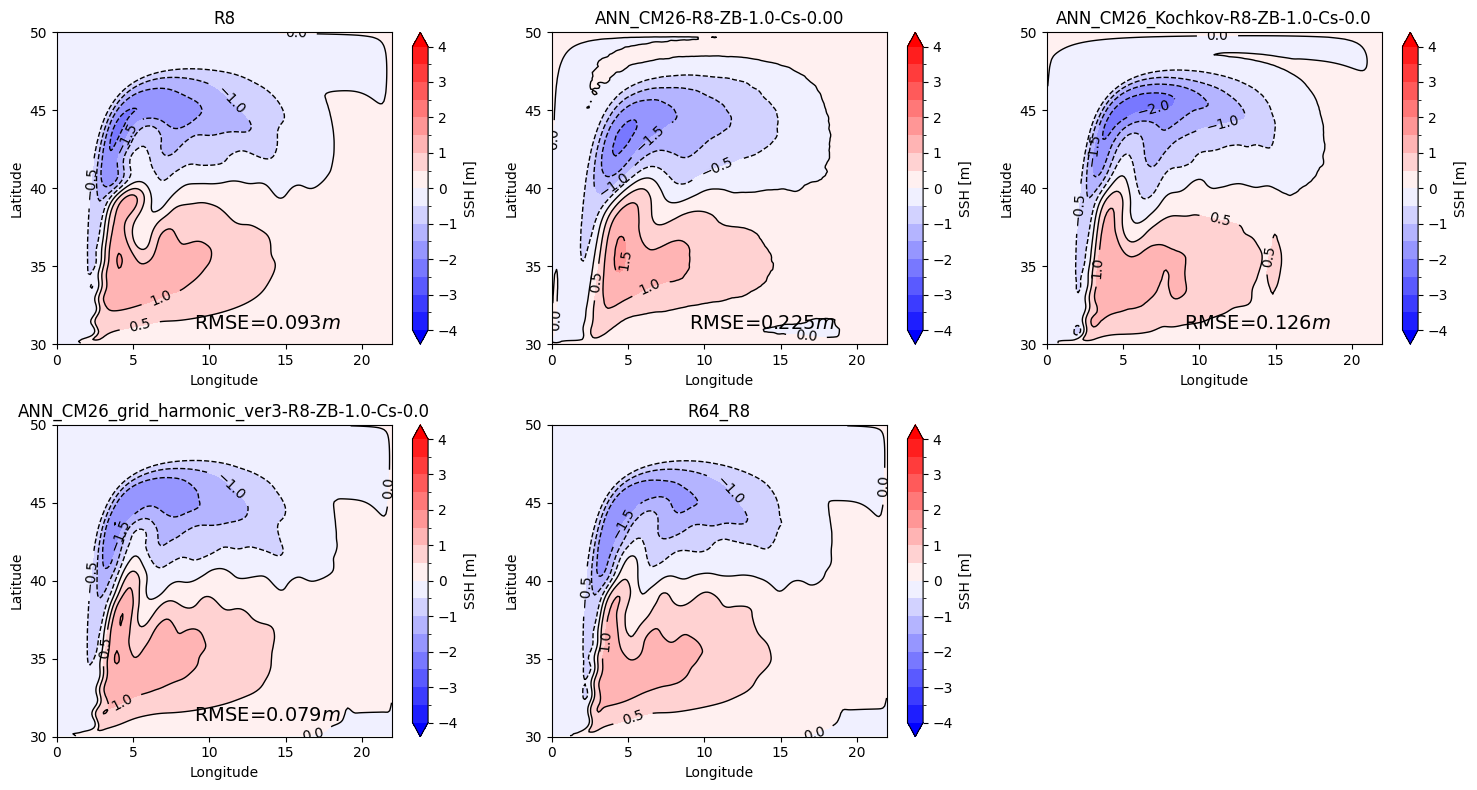

In [9]:
ds.plot_ssh(['R8', 'ANN_CM26-R8-ZB-1.0-Cs-0.00', 'ANN_CM26_Kochkov-R8-ZB-1.0-Cs-0.0', 'ANN_CM26_grid_harmonic_ver3-R8-ZB-1.0-Cs-0.0', 'R64_R8'])

# RV

In [24]:
kochkov = xr.open_dataset('/scratch/pp2681/mom6/Apr2023/generalization/ANN_CM26_Kochkov-R4/ZB-1.0-Cs-0.0/output/prog__0001_031.nc')
kochkov_vorticity = xr.open_dataset('/scratch/pp2681/mom6/Apr2023/generalization/ANN_CM26_Kochkov_vorticity-R4/ZB-1.0-Cs-0.0/output/prog__0001_031.nc')

In [26]:
kochkov.RV.hvplot(x='xq',y='yq',cmap='bwr', width=500, clim=(-2e-5,2e-5)) + \
kochkov_vorticity.RV.hvplot(x='xq',y='yq',cmap='bwr', width=500)

:Layout
   .DynamicMap.I  :DynamicMap   [Time,zl]
      :Image   [xq,yq]   (RV)
   .DynamicMap.II :DynamicMap   [Time,zl]
      :Image   [xq,yq]   (RV)

# ANNs

In [6]:
def plot(idx=-1, ncols=5):
    RR='R8'
    ds.plot_RV([RR,
                f'ANN_CM26-{RR}-ZB-1.0-Cs-0.00',
                f'ANN_CM26_grid_harmonic_ver3-{RR}-ZB-1.0-Cs-0.0',
                f'ZB-clean-{RR}-ZB-0.3',
                f'ZB-Smooth-{RR}-ZB-1.0', 
                f'ZB-Reynolds-{RR}-ZB-2.0', 
                f'Jansen-Held-{RR}-ref',
                f'{RR}_GZ-20YEAR',
                f'R64_{RR}'],
               ['Bih. Smag', 
                'ANN (inviscid)', 
                'ANN constrained (inviscid)',
                'ZB20 + Bih. Smag', 
                'ZB20-Smooth + Bih. Smag',
                'ZB20-Reynolds + Bih. Smag', 
                'JH15',
                'GZ21 + Bih. Smag',
                '$1/64^o$ coarsegrained'],
                idx=idx, ncols=ncols)
    plt.suptitle('Experiments at resolution $1/8^o$', fontsize=30, y=1.05)

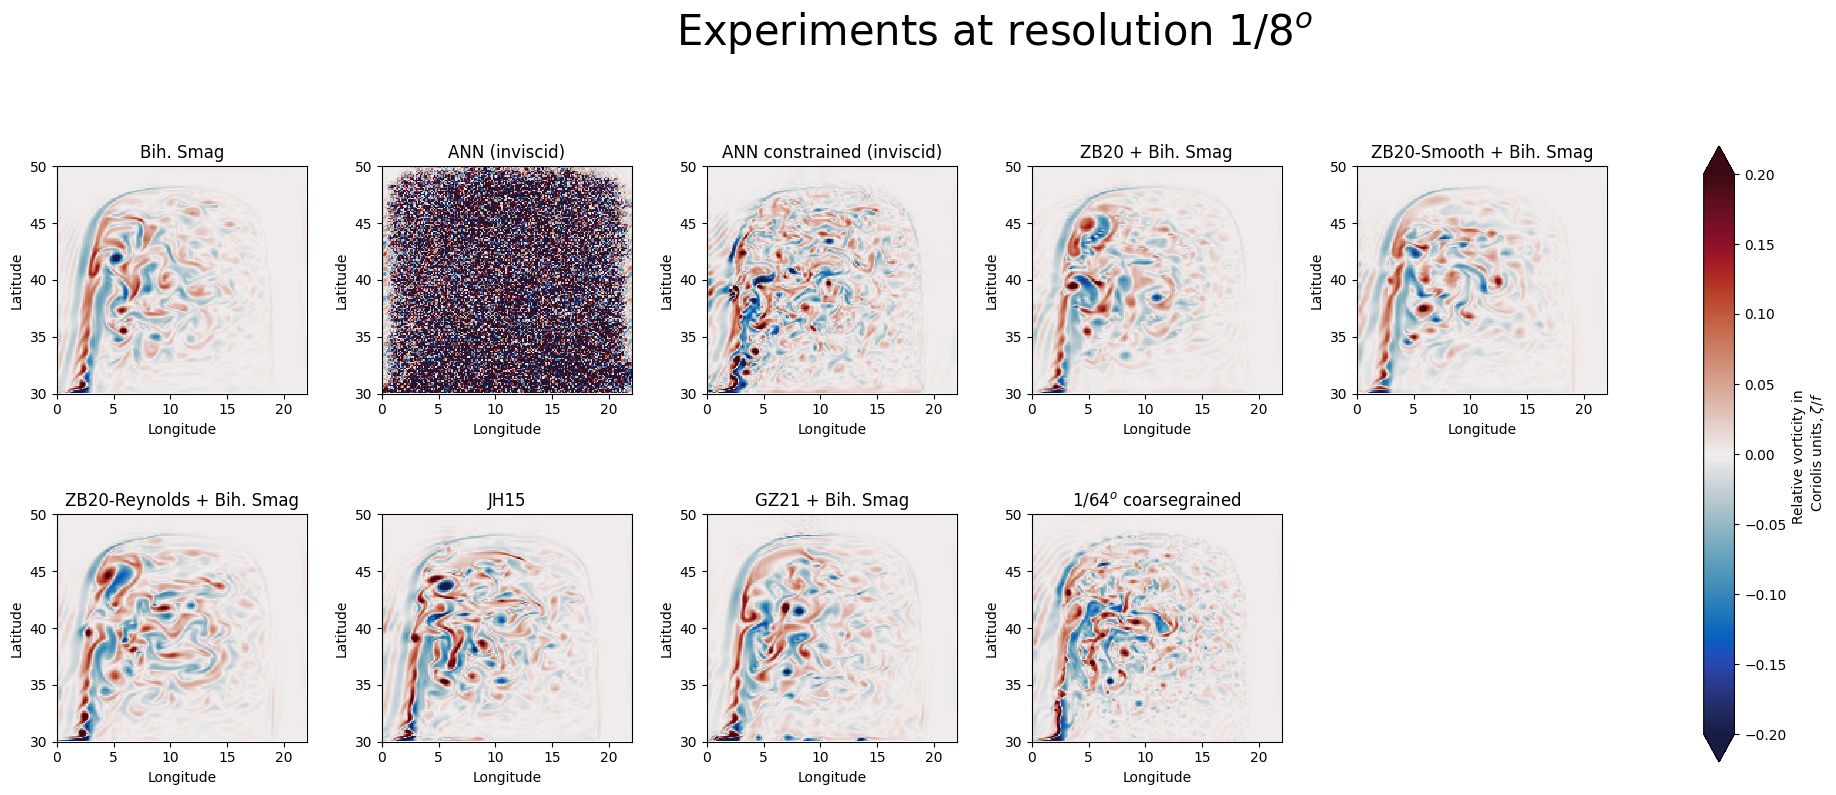

In [7]:
plot()

In [22]:
from helpers.plot_helpers import create_animation_ffmpeg

In [24]:
%time create_animation_ffmpeg(plot, range(243), FPS=15, filename='ANN_all_models.mp4', dpi=200)

Native resolution of snapshots is used: 3670x1590

Animation ANN_all_models.mp4 at FPS=15 will last for 16.2 seconds. The frames are saved to 
.ffmpeg/ANN_all_models



ffmpeg version 4.2.4-1ubuntu0.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.3.0-10ubuntu2)
  configuration: --prefix=/usr --extra-version=1ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-l

CPU times: user 7min 39s, sys: 2min 31s, total: 10min 11s
Wall time: 9min 10s


frame=  243 fps=8.2 q=-1.0 Lsize=   58508kB time=00:00:16.00 bitrate=29955.9kbits/s speed=0.539x    
video:58504kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.006976%
[libx264 @ 0x55578a09c800] frame I:1     Avg QP:17.35  size:114057
[libx264 @ 0x55578a09c800] frame P:61    Avg QP:16.88  size:264255
[libx264 @ 0x55578a09c800] frame B:181   Avg QP:17.52  size:241291
[libx264 @ 0x55578a09c800] consecutive B-frames:  0.4%  0.8%  0.0% 98.8%
[libx264 @ 0x55578a09c800] mb I  I16..4: 15.0% 75.3%  9.7%
[libx264 @ 0x55578a09c800] mb P  I16..4:  0.8% 12.1%  7.9%  P16..4:  4.3%  3.7%  2.1%  0.0%  0.0%    skip:69.2%
[libx264 @ 0x55578a09c800] mb B  I16..4:  0.5%  5.4%  6.6%  B16..8:  6.5%  6.1%  3.4%  direct: 1.4%  skip:70.1%  L0:47.6% L1:36.2% BI:16.2%
[libx264 @ 0x55578a09c800] 8x8 transform intra:49.4% inter:70.0%
[libx264 @ 0x55578a09c800] coded y,uvDC,uvAC intra: 89.8% 89.8% 82.4% inter: 12.0% 8.7% 4.2%
[libx264 @ 0x55578a09c800] i16 v,h,dc,p: 66% 29%  2%  2

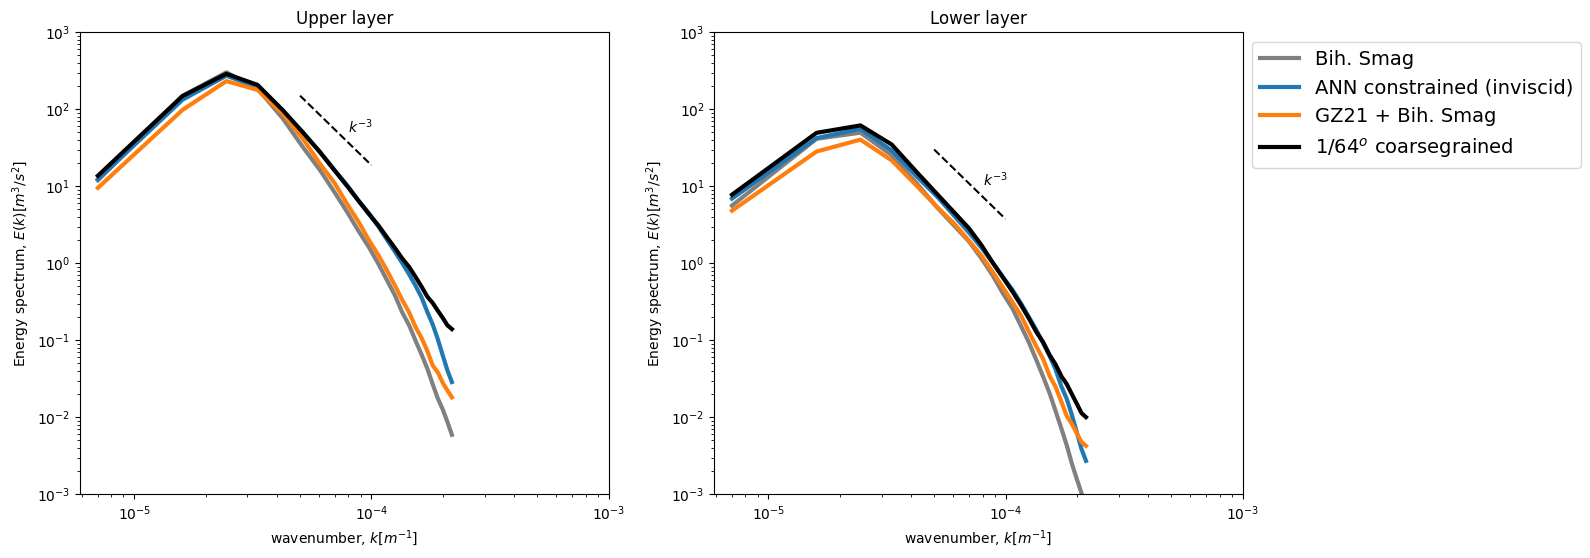

In [65]:
RR = 'R8'
ds.plot_KE_spectrum([RR,
#            f'ANN_CM26-{RR}-ZB-1.0-Cs-0.00',
            f'ANN_CM26_grid_harmonic_ver3-{RR}-ZB-1.0-Cs-0.0',
#            f'ZB-clean-{RR}-ZB-0.3',
#            f'ZB-Smooth-{RR}-ZB-1.0', 
#            f'ZB-Reynolds-{RR}-ZB-2.0', 
#            f'Jansen-Held-{RR}-ref',
            f'{RR}_GZ-20YEAR',
            f'R64_{RR}'],
           labels=['Bih. Smag', 
#            'ANN (inviscid)', 
            'ANN constrained (inviscid)',
#            'ZB20 + Bih. Smag', 
#            'ZB20-Smooth + Bih. Smag',
#            'ZB20-Reynolds + Bih. Smag', 
#            'JH15',
            'GZ21 + Bih. Smag',
            '$1/64^o$ coarsegrained']);

Text(0, 0.5, 'KE transfer, $m^2 s^{-3}$')

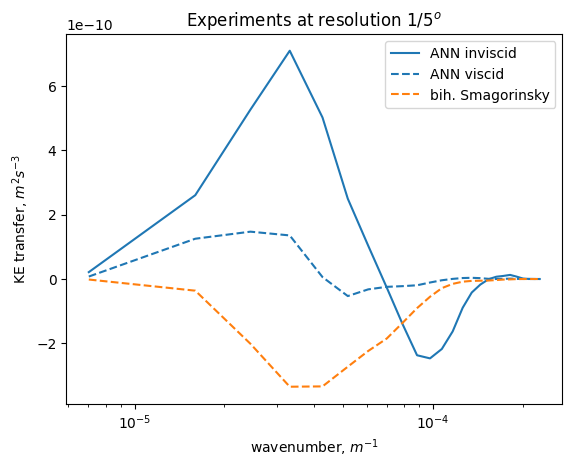

In [32]:
def compensated(E):
    return E * E.freq_r
compensated(ds[f'ANN_CM26_grid_harmonic_ver3-R5-ZB-1.0-Cs-0.0'].ZB_transfer).isel(zl=0).plot(ls='-', color='tab:blue', label='ANN inviscid')
compensated(ds[f'ANN_CM26_grid_harmonic_ver3-R5-ZB-1.0-Cs-0.06'].ZB_transfer).isel(zl=0).plot(ls='--',label='ANN viscid')
compensated(ds[f'ANN_CM26_grid_harmonic_ver3-R5-ZB-1.0-Cs-0.06'].Model_transfer).isel(zl=0).plot(ls='--',label='bih. Smagorinsky')
plt.legend()
plt.xscale('log')
plt.title('Experiments at resolution $1/5^o$')
plt.xlabel('wavenumber, $m^{-1}$')
plt.ylabel('KE transfer, $m^2 s^{-3}$')

item not found
item not found
item not found
item not found


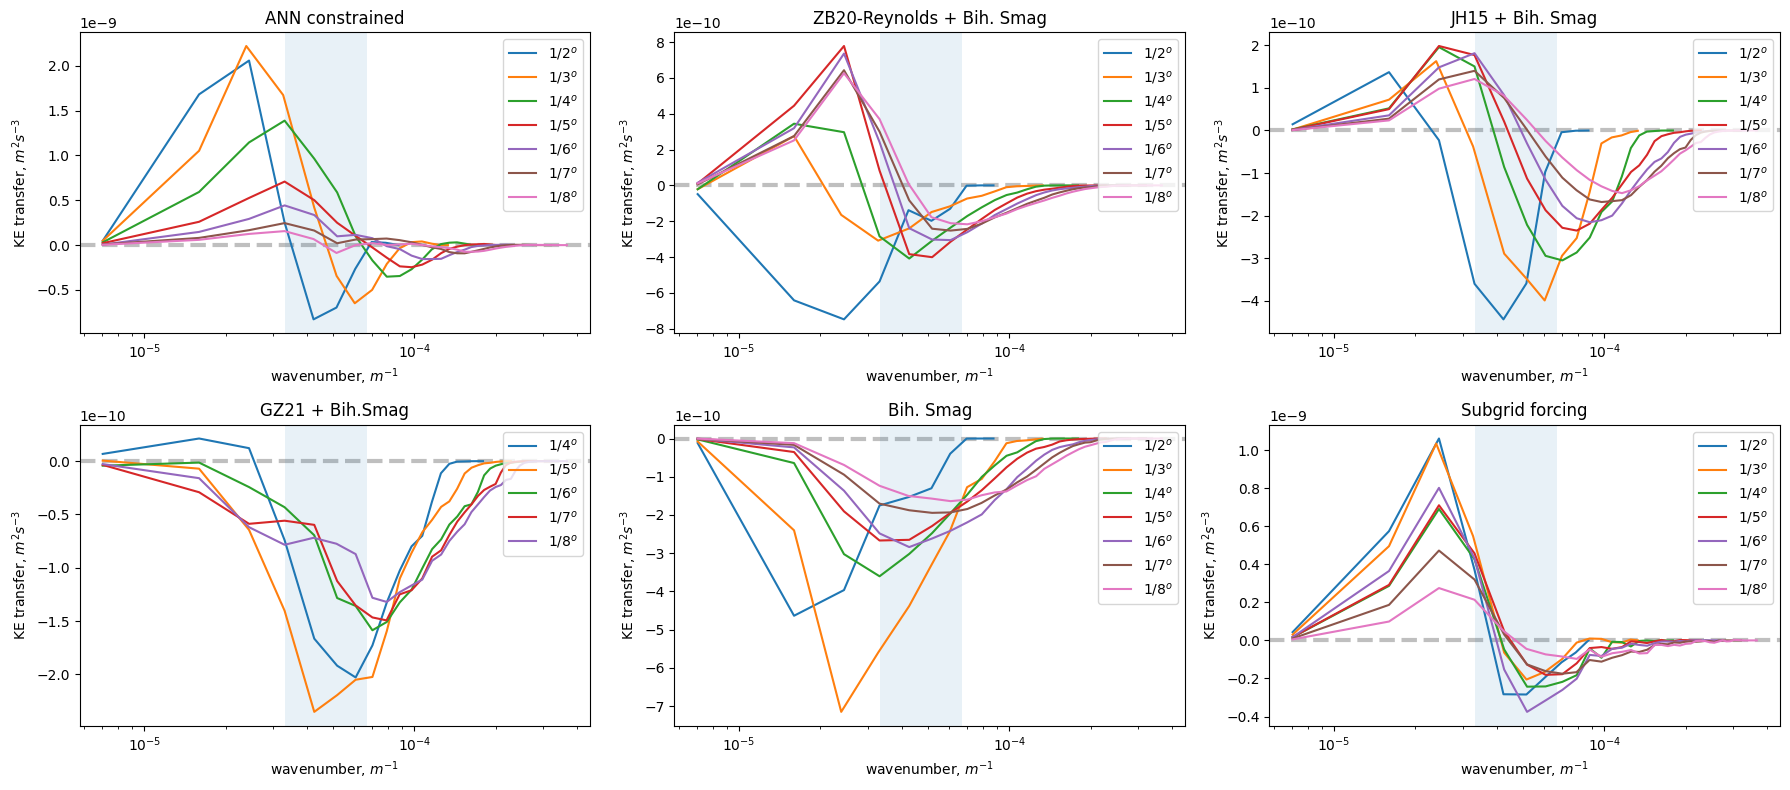

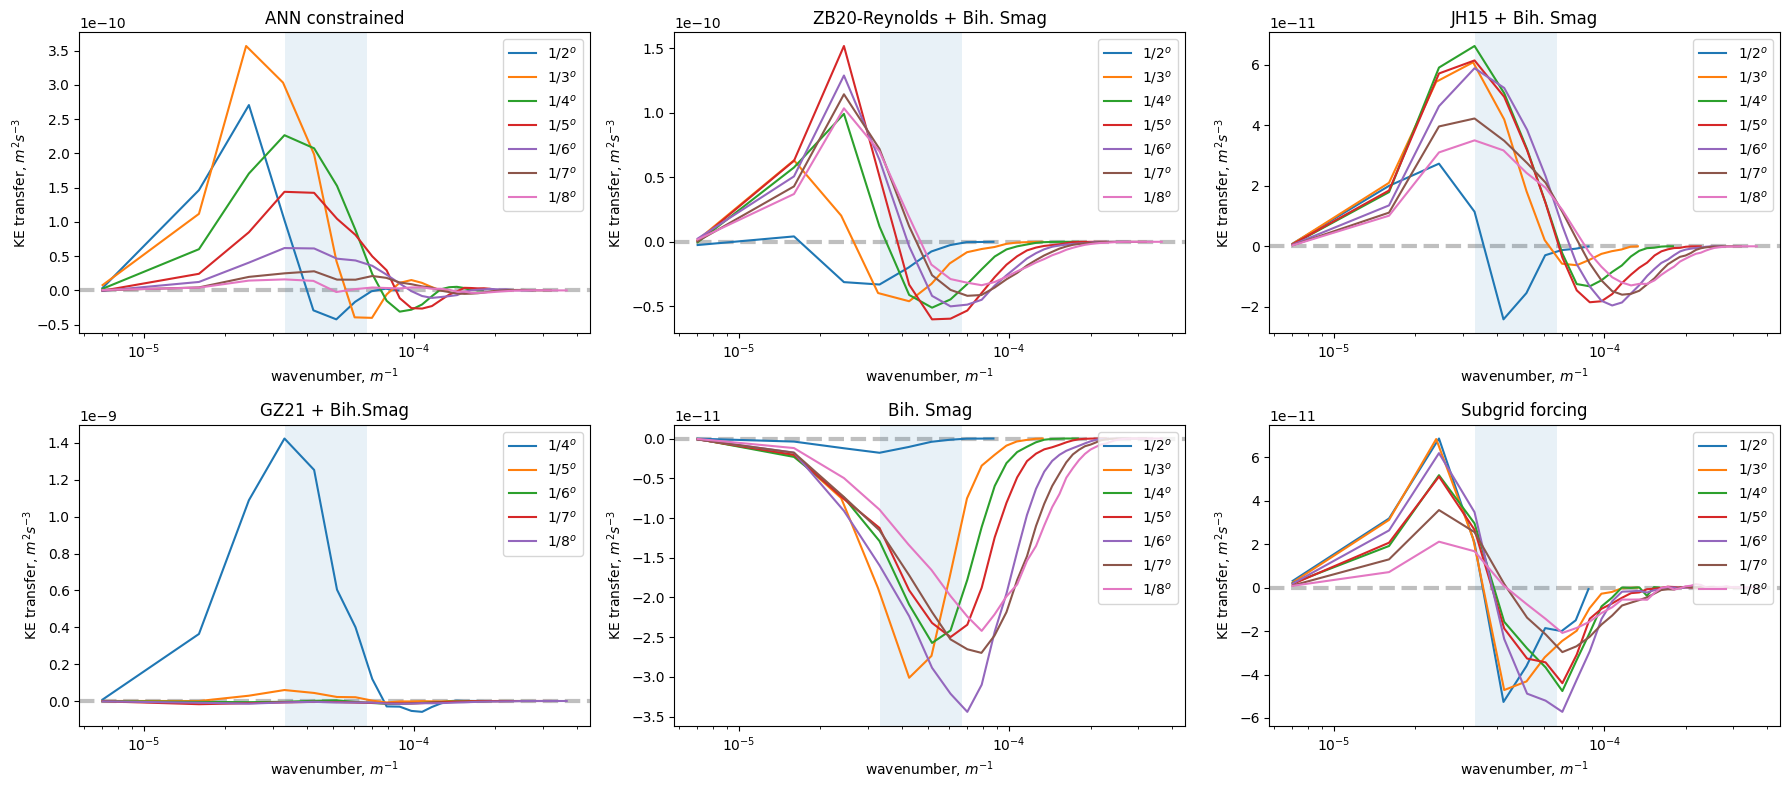

In [25]:
def compensated(E):
    return E * E.freq_r
for zl in [0,1]:
    plt.figure(figsize=(18,8))
    for RR, res in zip(['R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8'], ['$1/2^o$', '$1/3^o$', '$1/4^o$', '$1/5^o$', '$1/6^o$', '$1/7^o$', '$1/8^o$']):
        for col, (model, label) in enumerate(zip(
            [f'ANN_CM26_grid_harmonic_ver3-{RR}-ZB-1.0-Cs-0.0', f'ZB-Reynolds-{RR}-ZB-2.0', f'Jansen-Held-{RR}-ref', f'{RR}_GZ-20YEAR', RR, f'R64_{RR}'],
            ['ANN constrained', 'ZB20-Reynolds + Bih. Smag', 'JH15 + Bih. Smag', 'GZ21 + Bih.Smag', 'Bih. Smag',  'Subgrid forcing'])):
            try:
                plt.subplot(2,3,1+col)
                if 'R64' in model:
                    csp = ds[model].SGS_transfer.isel(zl=zl)
                elif 'Jansen' in model or 'Reynolds' in model or model==RR:
                    csp = ds[model].Model_transfer.isel(zl=zl)
                elif 'GZ' in model:
                    csp = ds[model].GZ_transfer.isel(zl=zl) + ds[model].Model_transfer.isel(zl=zl)
                else:
                    csp =  ds[model].ZB_transfer.isel(zl=zl)

                compensated(csp).plot(label=res)
                plt.legend(loc='upper right')
                plt.xscale('log')
                plt.title(label)
                plt.xlabel('wavenumber, $m^{-1}$')
                plt.ylabel('KE transfer, $m^2 s^{-3}$')
        #        plt.ylim([-1e-9, 2.5e-9])
                if RR == 'R8':
                    plt.axhline(y=0, color='gray', ls='--', lw=3, alpha=0.5, zorder=-1)
                    Rd1 = 30000
                    Rd2 = 15000
                    plt.axvspan(1/Rd1, 1/Rd2, color='tab:blue', alpha=0.1, lw=0)
            except:
                pass
    plt.tight_layout()